### NLP with sequence models

libraries

In [15]:
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import os

1- pretraitement des donnees

In [16]:
def load_data(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
        

    sentences, labels = [], []
    sentence, label = [], []

    for line in lines:
        if line == "\n" or line.startswith("-DOCSTART-"):
            if sentence and label:
                sentences.append(sentence)
                labels.append(label)
                sentence, label = [], []
        else:
            word, _, _, tag = line.strip().split()
            sentence.append(word.lower())  # Normalize the case
            label.append(tag)

    return sentences, labels

train_file_path = "dataset/eng.train"
test_file_path = "dataset/eng.testa"

train_sentences, train_labels = load_data(train_file_path)
test_sentences, test_labels = load_data(test_file_path)

In [17]:
df = pd.DataFrame({
    "train_sentences":train_sentences,
    "train_labels":train_labels
})
df

,train_sentences,train_labels
0,"[eu, rejects, german, call, to, boycott, briti...","[B-ORG, O, B-MISC, O, O, O, B-MISC, O, O]"
1,"[peter, blackburn]","[B-PER, I-PER]"
2,"[brussels, 1996-08-22]","[B-LOC, O]"
3,"[the, european, commission, said, on, thursday...","[O, B-ORG, I-ORG, O, O, O, O, O, O, B-MISC, O,..."
4,"[germany, 's, representative, to, the, europea...","[B-LOC, O, O, O, O, B-ORG, I-ORG, O, O, O, B-P..."
...,...,...
14036,"[on, friday, :]","[O, O, O]"
14037,"[division, two]","[O, O]"
14038,"[plymouth, 2, preston, 1]","[B-ORG, O, B-ORG, O]"
14039,"[division, three]","[O, O]"


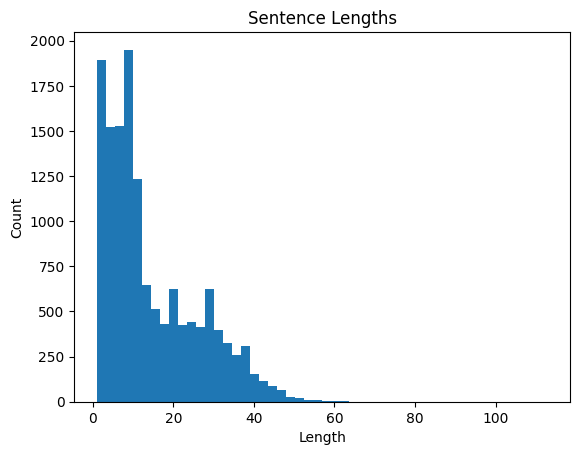

In [18]:
# Plot a histogram of the sentence lengths
sentence_lengths = [len(sentence) for sentence in df['train_sentences']]
plt.hist(sentence_lengths, bins=50)
plt.title('Sentence Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

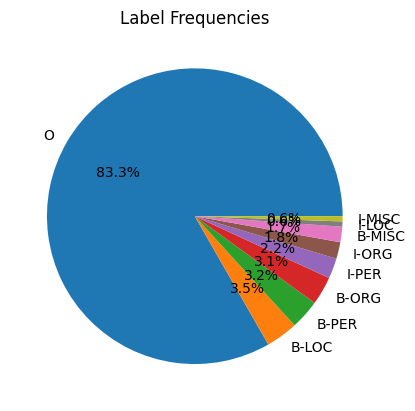

In [19]:
# Plot a pie chart of the label frequencies
label_counts = df['train_labels'].explode().value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Label Frequencies')
plt.show()

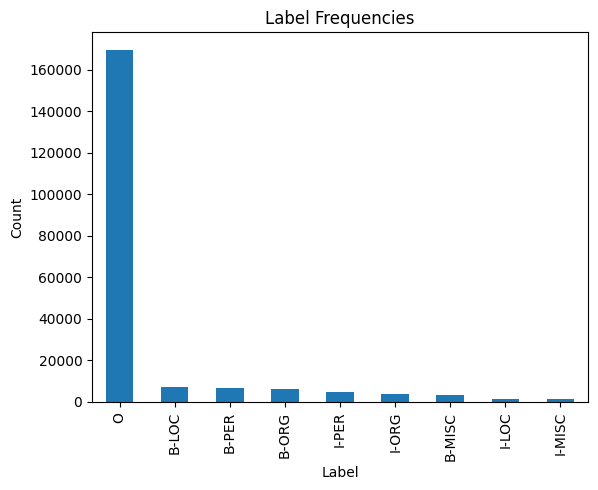

In [20]:
# Plot a bar chart of the label frequencies
label_counts.plot(kind='bar')
plt.title('Label Frequencies')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

2- vectorisation des donnees

In [21]:
max_len = 50

# Tokenize sentences
word_tokenizer = tf.keras.preprocessing.text.Tokenizer()
word_tokenizer.fit_on_texts(train_sentences)
train_sequences = word_tokenizer.texts_to_sequences(train_sentences)
test_sequences = word_tokenizer.texts_to_sequences(test_sentences)

# Pad sentences
X_train = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_len)
X_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_len)

# Tokenize labels
label_tokenizer = tf.keras.preprocessing.text.Tokenizer()
label_tokenizer.fit_on_texts(train_labels)
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)

# Pad labels
y_train = tf.keras.preprocessing.sequence.pad_sequences(train_label_sequences, maxlen=max_len)
y_test = tf.keras.preprocessing.sequence.pad_sequences(test_label_sequences, maxlen=max_len)

3- entrainement du modele

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
# from tensorflow.keras.optimizers import Adam

# vocab_size = len(word_tokenizer.word_index) + 1

# embedding_dim = 100
# hidden_units = 64
# num_classes = len(label_tokenizer.word_index) + 1
# batch_size = 32
# num_epochs = 10

# # Création du modèle
# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
# model.add(Bidirectional(LSTM(units=hidden_units, return_sequences=True)))
# model.add(Dense(num_classes, activation='softmax'))

# # Compilation du modèle
# model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

4- evaluation du modele

5- amelioration du modele